## SIR model

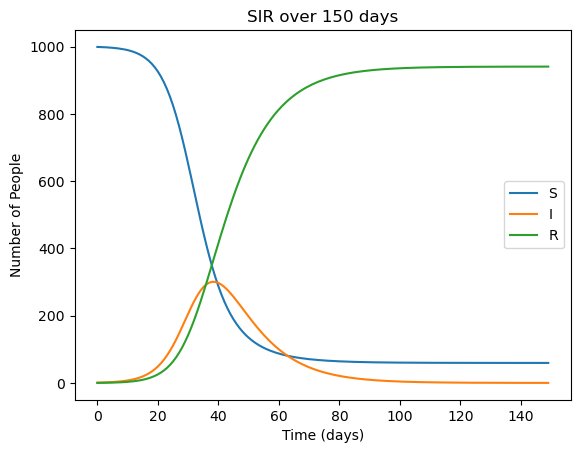

In [50]:
# S - susceptible
# I - infected
# R - recovered
# B - transmission rate
# G - recovery rate

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y,t,G,B):
    S,I,R = y
    dS_dt = - (B*S*I) # how susceptability fluctuates with time is dependent on transmission rate, num of susceptible people and num of infected
    dI_dt = B*S*I - (G*I) # how the number of infected changes with time is dependent on ^^ minus how many infected are recovering
    dR_dt = G*I # the num of recovered people changes with time dependent upon recovery

    return [dS_dt, dI_dt, dR_dt]

#constants
G = 0.1
B = 0.0003

initial_cond = [999, 1, 0]
time_points = np.arange(0, 150, 1) # 150 days

solution = odeint(system, initial_cond, time_points, args=(G,B))

#plot 
plt.plot(time_points, solution.T[0], label='S')
plt.plot(time_points, solution.T[1], label='I')
plt.plot(time_points, solution.T[2], label='R')
plt.title('SIR over 150 days')
plt.xlabel('Time (days)')
plt.ylabel('Number of People')
plt.legend()
plt.show()



**Figure 1: simulated response of susceptible, infected and recovered over a 150 day period**

## SEIR model 

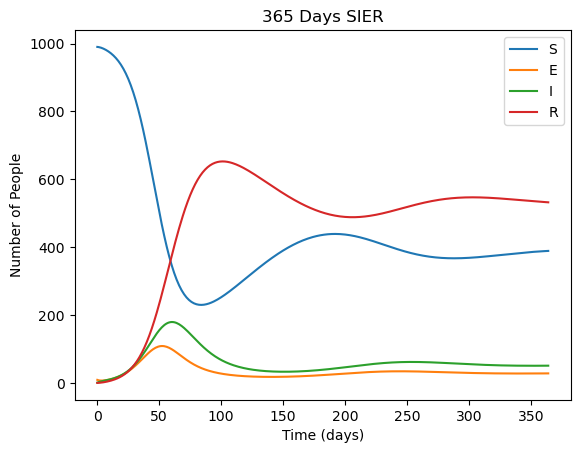

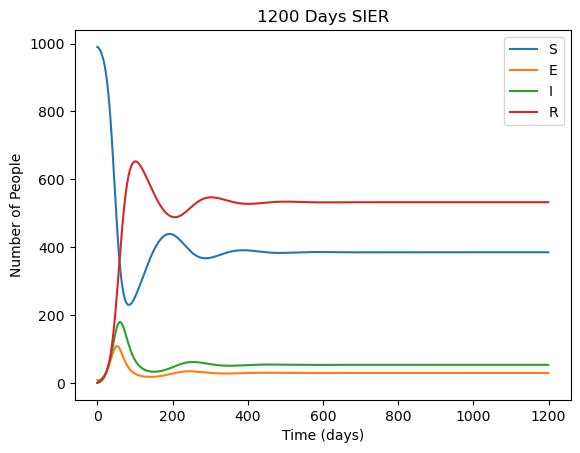

In [46]:
# S - susceptible
# E - exposed
# I - infected
# R - recovered
# B - transmission rate
# G - recovery rate
# sig - rate of becoming infectious
# m - birth/death rate
# N - total population

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system2(y,t,G,B,sig,m,N):
    S,E,I,R = y
    dS_dt = m*N - (B*S*I) - m*S 
    dE_dt = B*S*I - (sig+m) * E
    dI_dt = sig * E - (G+m)*I 
    dR_dt = G*I - m*R
    return [dS_dt, dE_dt, dI_dt, dR_dt]

# constants
G = 0.1
B = 0.0003
sig = 0.2
m = 0.01
N = 1000

initial_cond = [990, 9, 1, 0]
time_points1 = np.arange(0, 365, 1)
time_points2 = np.arange(0, 1200, 1)

#run simulation for 365 days 
solution = odeint(system2, initial_cond, time_points1, args=(G,B,sig,m,N))

#plot 
plt.plot(time_points1, solution.T[0], label='S')
plt.plot(time_points1, solution.T[1], label='E')
plt.plot(time_points1, solution.T[2], label='I')
plt.plot(time_points1, solution.T[3], label='R')
plt.title('365 Days SIER')
plt.xlabel('Time (days)')
plt.ylabel('Number of People')
plt.legend()
plt.show()

#run simulation for 1200 days 
solution2 = odeint(system2, initial_cond, time_points2, args=(G,B,sig,m,N))

#plot 
plt.plot(time_points2, solution2.T[0], label='S')
plt.plot(time_points2, solution2.T[1], label='E')
plt.plot(time_points2, solution2.T[2], label='I')
plt.plot(time_points2, solution2.T[3], label='R')
plt.title('1200 Days SIER')
plt.xlabel('Time (days)')
plt.ylabel('Number of People')
plt.legend()
plt.show()



**Figures 2 and 3:** simulated response of suceptible, exposed, infected and recovered over a 365 and 1200 day time period respectively. Initial conditions are suceptible: 990, exposed: 9, infected: 1, recovered 0]

### Sensitivity Analysis

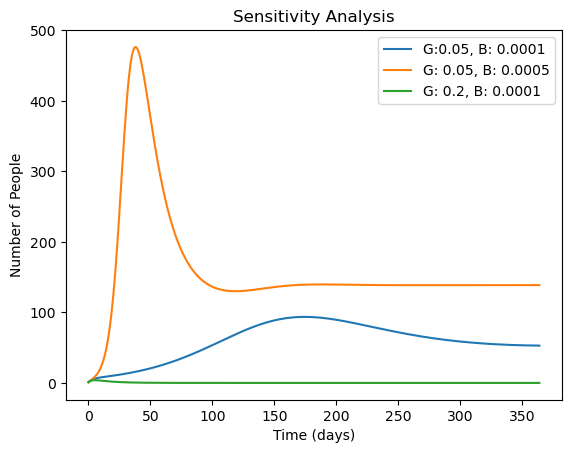

In [47]:
# Changing transmission rate and the recovery rate
G = 0.05
B = 0.0001

initial_cond = [990, 9, 1, 0]
time_points1 = np.arange(0, 365, 1)

#run simulation for 365 days 
solution = odeint(system2, initial_cond, time_points1, args=(G,B,sig,m,N))
G,B = 0.05, 0.0005
solution1 = odeint(system2, initial_cond, time_points1, args=(G,B,sig,m,N))
G,B = 0.2, 0.0001
solution2 = odeint(system2, initial_cond, time_points1, args=(G,B,sig,m,N))

total_I = []
total = 0
for each in solution.T[2]:
    total += each 
    total_I.append(total)
#plot 
plt.plot(time_points1, solution.T[2], label='G:0.05, B: 0.0001')
plt.plot(time_points1, solution1.T[2], label='G: 0.05, B: 0.0005')
plt.plot(time_points1, solution2.T[2], label='G: 0.2, B: 0.0001')
plt.title('Sensitivity Analysis')
plt.xlabel('Time (days)')
plt.ylabel('Number of People')
plt.legend()
plt.show()



**Figure 4:** sensitivity analysis of SEIR model using three sets of transmission rate (B) and recovery rate (G)